In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import matplotlib as mpl

from datetime import datetime
from definer.data import graph

mpl.style.use('classic')

In [2]:
def get_amount0(sqrtA, sqrtB, liquidity, decimals):
    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    amount0 = (liquidity * 2 ** 96 * (sqrtB - sqrtA) / sqrtB / sqrtA) / 10 ** decimals

    return amount0


def get_amount1(sqrtA, sqrtB, liquidity, decimals):
    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    amount1 = liquidity * (sqrtB - sqrtA) / 2 ** 96 / 10 ** decimals

    return amount1


def get_amounts(asqrt, asqrtA, asqrtB, liquidity, decimal0, decimal1):
    sqrt = (np.sqrt(asqrt * 10 ** (decimal1 - decimal0))) * (2 ** 96)
    sqrtA = np.sqrt(asqrtA * 10 ** (decimal1 - decimal0)) * (2 ** 96)
    sqrtB = np.sqrt(asqrtB * 10 ** (decimal1 - decimal0)) * (2 ** 96)

    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    if sqrt <= sqrtA:

        amount0 = get_amount0(sqrtA, sqrtB, liquidity, decimal0)
        return amount0, 0

    elif sqrtB > sqrt > sqrtA:
        amount0 = get_amount0(sqrt, sqrtB, liquidity, decimal0)

        amount1 = get_amount1(sqrtA, sqrt, liquidity, decimal1)

        return amount0, amount1

    else:
        amount1 = get_amount1(sqrtA, sqrtB, liquidity, decimal1)
        return 0, amount1


'''get_liquidity function'''


# Use 'get_liquidity' function to calculate liquidity as a function of amounts and price range
def get_liquidity0(sqrtA, sqrtB, amount0, decimals):
    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    liquidity = amount0 / ((2 ** 96 * (sqrtB - sqrtA) / sqrtB / sqrtA) / 10 ** decimals)
    return liquidity


def get_liquidity1(sqrtA, sqrtB, amount1, decimals):
    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    liquidity = amount1 / ((sqrtB - sqrtA) / 2 ** 96 / 10 ** decimals)
    return liquidity


def get_liquidity(asqrt, asqrtA, asqrtB, amount0, amount1, decimal0, decimal1):
    sqrt = (np.sqrt(asqrt * 10 ** (decimal1 - decimal0))) * (2 ** 96)
    sqrtA = np.sqrt(asqrtA * 10 ** (decimal1 - decimal0)) * (2 ** 96)
    sqrtB = np.sqrt(asqrtB * 10 ** (decimal1 - decimal0)) * (2 ** 96)

    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    if sqrt <= sqrtA:

        liquidity0 = get_liquidity0(sqrtA, sqrtB, amount0, decimal0)
        return liquidity0

    elif sqrtB > sqrt > sqrtA:

        liquidity0 = get_liquidity0(sqrt, sqrtB, amount0, decimal0)
        liquidity1 = get_liquidity1(sqrtA, sqrt, amount1, decimal1)
        liquidity = liquidity0 if liquidity0 < liquidity1 else liquidity1
        return liquidity

    else:
        liquidity1 = get_liquidity1(sqrtA, sqrtB, amount1, decimal1)
        return liquidity1


Pool Address:

In [3]:
address = "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640"      # USDC-ETH 0.05% Uniswap V3 pool on Ethereum chain
# address = "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"    # ETH USDC Ethereum
# address = "0x2e9c575206288f2219409289035facac0b670c2f"    # ETH DAI Optimism
# address = "0x68f180fcce6836688e9084f035309e29bf0a2095"    # WBTC DAI
# address = "0x93f267fd92b432bebf4da4e13b8615bb8eb2095c"    # snx eth
# address = "0xcb0c5d9d92f4f2f80cce7aa271a1e148c226e19d"    # Rai Dai

In [4]:
after = '2022-01-01'  # 1632081600

In [5]:
dpd = graph(address, int(datetime.timestamp(datetime.strptime(after, "%Y-%m-%d"))))
dpd.head()

2021-12-31 16:00:00


,periodStartUnix,liquidity,high,low,close,feeGrowthGlobal0X128,feeGrowthGlobal1X128,pool.totalValueLockedUSD,pool.totalValueLockedToken1,pool.totalValueLockedToken0,pool.token0.decimals,pool.token1.decimals
0,1.704539e+09,1.139715e+19,2237.677703,2219.578335,2237.676370,2.553654e+33,1.236661e+42,3.841637e+08,74786.731782,2.170992e+08,6.0,18.0
1,1.704535e+09,1.139676e+19,2239.290407,2232.701987,2237.622580,2.553612e+33,1.236642e+42,3.841637e+08,74786.731782,2.170992e+08,6.0,18.0
2,1.704532e+09,1.136448e+19,2239.837959,2236.527907,2236.542824,2.553597e+33,1.236636e+42,3.841637e+08,74786.731782,2.170992e+08,6.0,18.0
3,1.704528e+09,1.136362e+19,2238.529679,2231.448205,2238.212643,2.553586e+33,1.236630e+42,3.841637e+08,74786.731782,2.170992e+08,6.0,18.0
4,1.704524e+09,1.137105e+19,2233.981411,2219.742541,2233.893643,2.553562e+33,1.236623e+42,3.841637e+08,74786.731782,2.170992e+08,6.0,18.0


<AxesSubplot:xlabel='periodStartUnix', ylabel='close'>

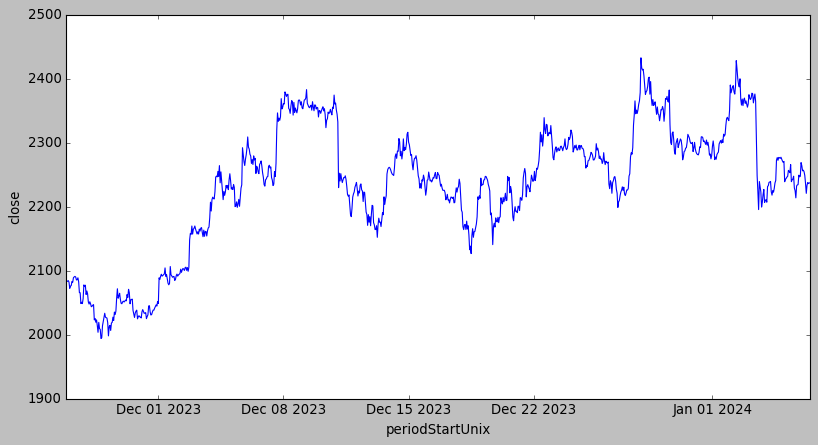

In [6]:
f = plt.figure(figsize=(12,6))
sns.lineplot(x=pd.to_datetime(dpd.periodStartUnix, unit='s'), y=dpd.close)

In [7]:
print(datetime.utcfromtimestamp(
    dpd.periodStartUnix.min()
).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.utcfromtimestamp(
    dpd.periodStartUnix.max()
).strftime('%Y-%m-%d %H:%M:%S'))

2023-11-25 20:00:00
2024-01-06 11:00:00


In [8]:
decimal0 = dpd.iloc[0]['pool.token0.decimals']
decimal1 = dpd.iloc[0]['pool.token1.decimals']
decimal = decimal1 - decimal0
print(decimal0, decimal1, decimal)

6.0 18.0 12.0


In [9]:
dpd['fg0'] = ((dpd['feeGrowthGlobal0X128']) / (2 ** 128)) / (10 ** decimal0)
dpd['fg1'] = ((dpd['feeGrowthGlobal1X128']) / (2 ** 128)) / (10 ** decimal1)

In [10]:
print(dpd['close'].iloc[-1])

2083.847473643345


In [11]:
mini = 1982.32
maxi = 2519.99
target = dpd['close'].iloc[-1]  # the initial price
# target = 2711.53
base = 0

Calculate F0G and F1G (fee earned by an unbounded unit of liquidity in one period):

In [12]:
dpd['fg0shift'] = dpd['fg0'].shift(-1)
dpd['fg1shift'] = dpd['fg1'].shift(-1)
dpd['fee0token'] = dpd['fg0'] - dpd['fg0shift']
dpd['fee1token'] = dpd['fg1'] - dpd['fg1shift']

Calculate my liquidity:

In [13]:
SMIN = np.sqrt(mini * 10 ** decimal)
SMAX = np.sqrt(maxi * 10 ** decimal)
print(SMIN, SMAX)

44523252.35200142 50199501.98956161


In [14]:
print(datetime.utcfromtimestamp(
    dpd.periodStartUnix.iloc[-1]
).strftime('%Y-%m-%d %H:%M:%S'))

2023-11-25 20:00:00


In [15]:
dpd['close'].iloc[-1]

2083.847473643345

In [16]:
if base == 0:

    sqrt0 = np.sqrt(dpd['close'].iloc[-1] * 10 ** decimal)
    dpd['price0'] = dpd['close']

else:

    sqrt0 = np.sqrt(1 / dpd['close'].iloc[-1] * 10 ** decimal)
    dpd['price0'] = 1 / dpd['close']


if SMIN < sqrt0 < SMAX:

    deltaL = target / ((sqrt0 - SMIN) + (((1 / sqrt0) - (1 / SMAX)) * (dpd['price0'].iloc[-1] * 10 ** decimal)))
    amount1 = deltaL * (sqrt0 - SMIN)
    amount0 = deltaL * ((1 / sqrt0) - (1 / SMAX)) * 10 ** decimal

elif sqrt0 < SMIN:

    deltaL = target / (((1 / SMIN) - (1 / SMAX)) * (dpd['price0'].iloc[-1]))
    amount1 = 0
    amount0 = deltaL * ((1 / SMIN) - (1 / SMAX))

else:
    deltaL = target / (SMAX - SMIN)
    amount1 = deltaL * (SMAX - SMIN)
    amount0 = 0
    
print("Amounts:", amount0, amount1)

Amounts: 0.7860996274338482 445.7357509833457


In [17]:
# print(dpd['price0'].iloc[-1],mini,maxi)
# print((dpd['price0'].iloc[-1],mini,maxi,amount0,amount1,decimal0,decimal1))
myliquidity = get_liquidity(dpd['price0'].iloc[-1], mini, maxi, amount0, amount1, decimal0, decimal1)

print("OK myliquidity", myliquidity)

OK myliquidity 395883740862439.6


In [18]:
# Calculate ActiveLiq

dpd['ActiveLiq'] = 0
dpd['amount0'] = 0
dpd['amount1'] = 0
dpd['amount0unb'] = 0
dpd['amount1unb'] = 0

if base == 0:
    
    for i, row in dpd.iterrows():
        if dpd['high'].iloc[i] > mini and dpd['low'].iloc[i] < maxi:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = (
                    (min(maxi, dpd['high'].iloc[i]) - max(dpd['low'].iloc[i], mini)) / 
                    (dpd['high'].iloc[i] - dpd['low'].iloc[i]) * 100
            )
        else:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = 0

        amounts = get_amounts(dpd['price0'].iloc[i], mini, maxi, myliquidity, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0')] = amounts[1]
        dpd.iloc[i, dpd.columns.get_loc('amount1')] = amounts[0]

        amountsunb = get_amounts((dpd['price0'].iloc[i]), 1.0001 ** (-887220), 1.0001 ** 887220, 1, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0unb')] = amountsunb[1]
        dpd.iloc[i, dpd.columns.get_loc('amount1unb')] = amountsunb[0]
        
else:
    
    for i, row in dpd.iterrows():

        if (1 / dpd['low'].iloc[i]) > mini and (1 / dpd['high'].iloc[i]) < maxi:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = (min(maxi, 1 / dpd['low'].iloc[i]) - max(
                1 / dpd['high'].iloc[i], mini)) / ((1 / dpd['low'].iloc[i]) - (1 / dpd['high'].iloc[i])) * 100
        else:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = 0

        amounts = get_amounts((dpd['price0'].iloc[i] * 10 ** (decimal)), mini, maxi, myliquidity, decimal0,
                                        decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0')] = amounts[0]
        dpd.iloc[i, dpd.columns.get_loc('amount1')] = amounts[1]

        amountsunb = get_amounts((dpd['price0'].iloc[i]), 1.0001 ** (-887220), 1.0001 ** 887220, 1, decimal0,
                                           decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0unb')] = amountsunb[0]
        dpd.iloc[i, dpd.columns.get_loc('amount1unb')] = amountsunb[1]

In [19]:
## Final fee calculation

dpd['myfee0'] = dpd['fee0token'] * myliquidity * dpd['ActiveLiq'] / 100
dpd['myfee1'] = dpd['fee1token'] * myliquidity * dpd['ActiveLiq'] / 100

print(dpd['myfee0'].sum())
print(dpd['myfee1'].sum())

63.68684758363769
0.028159812946983505


In [20]:
if base == 0:
    
    dpd['feeV'] = (dpd['myfee0']) + (dpd['myfee1'] * dpd['close'])
    dpd['amountV'] = (dpd['amount0']) + (dpd['amount1'] * dpd['close'])
    dpd['amountunb'] = (dpd['amount0unb']) + (dpd['amount1unb'] * dpd['close'])
    dpd['fgV'] = (dpd['fee0token']) + (dpd['fee1token'] * dpd['close'])
    dpd['feeusd'] = dpd['feeV'] * (dpd['pool.totalValueLockedUSD'].iloc[0] / (
                dpd['pool.totalValueLockedToken1'].iloc[0] * dpd['close'].iloc[0] + (
        dpd['pool.totalValueLockedToken0'].iloc[0])))

else:

    dpd['feeV'] = (dpd['myfee0'] / dpd['close']) + dpd['myfee1']
    dpd['amountV'] = (dpd['amount0'] / dpd['close']) + dpd['amount1']
    dpd['feeVbase0'] = dpd['myfee0'] + (dpd['myfee1'] * dpd['close'])
    dpd['amountunb'] = (dpd['amount0unb'] / dpd['close']) + dpd['amount1unb']
    dpd['fgV'] = (dpd['fee0token'] / dpd['close']) + dpd['fee1token']
    dpd['feeusd'] = dpd['feeV'] * (dpd['pool.totalValueLockedUSD'].iloc[0] / (
                dpd['pool.totalValueLockedToken1'].iloc[0] + (
                    dpd['pool.totalValueLockedToken0'].iloc[0] / dpd['close'].iloc[0])))

dpd['date'] = pd.to_datetime(dpd['periodStartUnix'], unit='s')

### 1 Chart

In [43]:
# dpd['fgV']= (dpd['fg0'] / dpd['close'].iloc[0] + dpd['fg1'])
# rint(dpd['fg1']/dpd['amount1unb'])
data = dpd[['date', 'myfee0', 'myfee1', 'fgV', 'feeV', 'feeusd', 
            'amountV', 'ActiveLiq', 'amountunb', 'amount0', 'amount1', 'close']]
data = data.fillna(0)
data

,date,myfee0,myfee1,fgV,feeV,feeusd,amountV,ActiveLiq,amountunb,amount0,amount1,close
0,2024-01-06 11:00:00,0.048934,0.000022,2.474218e-16,0.097950,0.097878,2181.021346,100,9.460817e-11,1100.886064,0.482704,2237.676370
1,2024-01-06 10:00:00,0.017468,0.000007,8.250985e-17,0.032664,0.032640,2180.995379,100,9.460703e-11,1100.660982,0.482805,2237.622580
2,2024-01-06 09:00:00,0.012628,0.000007,7.261923e-17,0.028749,0.028728,2180.472977,100,9.458420e-11,1096.142190,0.484825,2236.542824
3,2024-01-06 08:00:00,0.028063,0.000009,1.190602e-16,0.047134,0.047099,2181.279938,100,9.461950e-11,1103.129940,0.481701,2238.212643
4,2024-01-06 07:00:00,0.055836,0.000013,2.157099e-16,0.085396,0.085333,2179.182018,100,9.452817e-11,1085.050715,0.489787,2233.893643
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-11-26 00:00:00,0.017143,0.000011,9.903313e-17,0.039206,0.039177,2082.981716,100,9.127426e-11,440.966511,0.788389,2082.747741
996,2023-11-25 23:00:00,0.009168,0.000003,3.950451e-17,0.015639,0.015628,2084.762123,100,9.132388e-11,450.788073,0.783676,2085.012798
997,2023-11-25 22:00:00,0.006450,0.000004,3.619887e-17,0.014331,0.014320,2083.783353,100,9.129657e-11,445.382096,0.786269,2083.765915
998,2023-11-25 21:00:00,0.014193,0.000006,6.853544e-17,0.027132,0.027112,2084.301244,100,9.131101e-11,448.240503,0.784898,2084.425157


In [37]:
temp = data.resample('D', on='date').sum()
temp2 = data.resample('D', on='date').mean()
temp3 = data.resample('D', on='date').first()
temp4 = data.resample('D', on='date').last()

In [39]:
final1 = temp[['myfee0', 'myfee1', 'feeV', 'fgV', 'feeusd']].copy()  # sum monthly
final1['ActiveLiq'] = temp2['ActiveLiq'].copy()  # average monthly
final1[['amountV', 'amountunb']] = temp3[['amountV', 'amountunb']].copy()  # first of each month
# use the amount at the last hour for the day, similar to the first for the next day
final1[['amountVlast']] = temp4[['amountV']]  # last of each month

final1['S1%'] = final1['feeV'] / final1['amountV'] * 100  # *365
final1['unb%'] = final1['fgV'] / final1['amountunb'] * 100  # *365
final1['multiplier'] = final1['S1%'] / final1['unb%']
final1['feeunb'] = final1['amountV'] * final1['unb%'] / 100

final1.to_csv("chart1.csv", sep=";")

print("this position returned", final1['feeV'].sum() / final1['amountV'].iloc[0] * 100, "in ", len(final1.index),
      " days, for an apr of ", final1['feeV'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100)
print("a base  position returned", final1['feeunb'].sum() / final1['amountV'].iloc[0] * 100, "in ", len(final1.index), 
      " days, for an apr of ", final1['feeunb'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100)

print("fee in token 1 and token 2", dpd['myfee0'].sum(), dpd['myfee1'].sum())
print("totalFee in USD", final1['feeusd'].sum())
print('Your liquidity was active for:', final1['ActiveLiq'].mean())

# forecast = (dpd['feeVbase0'].sum() * myliquidity * final1['ActiveLiq'].mean())
# print(dpd['feeVbase0'])
# print('forecast: ', forecast)

final1

this position returned 6.096519064169312 in  43  days, for an apr of  51.74952228887905
a base  position returned 0.3536557594808205 in  43  days, for an apr of  3.0019616793139416
fee in token 1 and token 2 63.68684758363769 0.028159812946983505
totalFee in USD 126.9483154860873
Your liquidity was active for: 100.0


,myfee0,myfee1,feeV,fgV,feeusd,ActiveLiq,amountV,amountunb,amountVlast,S1%,unb%,multiplier,feeunb
date,,,,,,,,,,,,,
2023-11-25,0.029810,0.000013,0.057102,1.442388e-16,0.057060,100.0,2083.847474,9.129836e-11,2084.762123,0.002740,0.000158,17.344616,0.003292
2023-11-26,0.598965,0.000312,1.244941,3.144714e-15,1.244021,100.0,2082.981716,9.127426e-11,2067.263261,0.059767,0.003445,17.347246,0.071766
2023-11-27,0.909435,0.000488,1.896581,4.790753e-15,1.895180,100.0,2071.731756,9.096677e-11,2036.198659,0.091546,0.005266,17.382687,0.109107
2023-11-28,0.972866,0.000454,1.899353,4.797755e-15,1.897950,100.0,2042.014250,9.019899e-11,2055.028186,0.093014,0.005319,17.486810,0.108616
2023-11-29,0.762469,0.000395,1.569336,3.964133e-15,1.568177,100.0,2057.456337,9.059045e-11,2037.065530,0.076276,0.004376,17.430885,0.090032
2023-11-30,0.605827,0.000272,1.159229,2.928205e-15,1.158372,100.0,2036.584049,9.006486e-11,2057.985061,0.056920,0.003251,17.507362,0.066214
2023-12-01,0.909816,0.000399,1.744161,4.405740e-15,1.742872,100.0,2055.430354,9.053820e-11,2086.339186,0.084856,0.004866,17.438004,0.100021
2023-12-02,1.015627,0.000395,1.862218,4.703951e-15,1.860842,100.0,2090.655771,9.149010e-11,2141.095885,0.089073,0.005141,17.324442,0.107491
2023-12-03,0.858882,0.000367,1.657525,4.186899e-15,1.656301,100.0,2142.088083,9.309960e-11,2157.978467,0.077379,0.004497,17.205930,0.096335


<AxesSubplot:xlabel='date', ylabel='feeusd'>

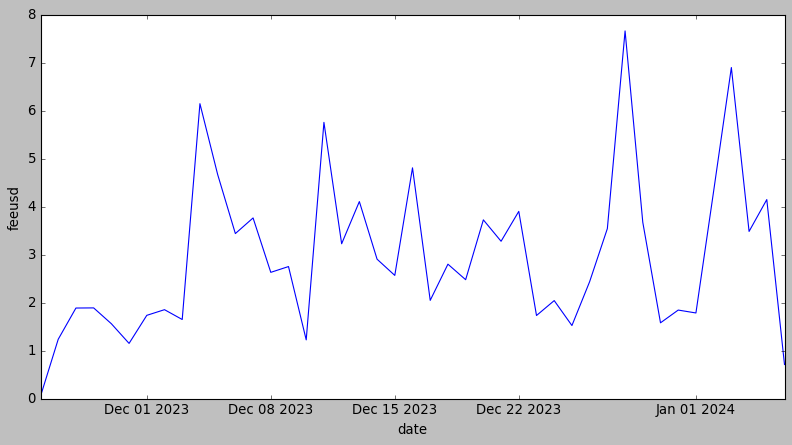

In [40]:
_ = plt.figure(figsize=(12,6))
sns.lineplot(x=final1.index, y=final1.feeusd)

## 2 chart

In [41]:
final2 = temp3[['amountV', 'amount0', 'amount1', 'close']].copy()
final2['feeV'] = temp['feeV'].copy()
final2[['amountVlast']] = temp4[['amountV']]

final2['HODL'] = final2['amount0'].iloc[0] + final2['amount1'].iloc[0] * final2['close']
final2['IL'] = final2['amountVlast'] - final2['HODL']
final2['ActiveLiq'] = temp2['ActiveLiq'].copy()
final2['feecumsum'] = final2['feeV'].cumsum()
final2['PNL'] = final2['feecumsum'] + final2['IL']  # -Bfinal['gas']

final2['HODLnorm'] = final2['HODL'] / final2['amountV'].iloc[0] * 100
final2['ILnorm'] = final2['IL'] / final2['amountV'].iloc[0] * 100
final2['PNLnorm'] = final2['PNL'] / final2['amountV'].iloc[0] * 100
final2['feecumsumnorm'] = final2['feecumsum'] / final2['amountV'].iloc[0] * 100

# ch2 = final2[['amountV', 'feecumsum']]
# ch3 = final2[['ILnorm', 'PNLnorm', 'feecumsumnorm']]

final2.to_csv("chart2.csv", sep=";")
final2

,amountV,amount0,amount1,close,feeV,amountVlast,HODL,IL,ActiveLiq,feecumsum,PNL,HODLnorm,ILnorm,PNLnorm,feecumsumnorm
date,,,,,,,,,,,,,,,
2023-11-25,2083.847474,445.735751,0.786100,2083.847474,0.057102,2084.762123,2083.847474,0.914649,100.0,0.057102,0.971751,100.000000,0.043892,0.046633,0.002740
2023-11-26,2082.981716,440.966511,0.788389,2082.747741,1.244941,2067.263261,2082.982974,-15.719713,100.0,1.302043,-14.417671,99.958514,-0.754360,-0.691877,0.062483
2023-11-27,2071.731756,380.100739,0.817711,2068.738273,1.896581,2036.198659,2071.970137,-35.771478,100.0,3.198624,-32.572854,99.430028,-1.716607,-1.563111,0.153496
2023-11-28,2042.014250,228.125862,0.891799,2033.964624,1.899353,2055.028186,2044.634584,10.393602,100.0,5.097977,15.491580,98.118246,0.498770,0.743412,0.244643
2023-11-29,2057.456337,305.611183,0.853868,2051.657354,1.569336,2037.065530,2058.542832,-21.477302,100.0,6.667313,-14.809989,98.785677,-1.030656,-0.710704,0.319952
2023-11-30,2036.584049,201.575614,0.904872,2027.919857,1.159229,2057.985061,2039.882795,18.102266,100.0,7.826542,25.928808,97.890216,0.868694,1.244276,0.375581
2023-12-01,2055.430354,295.269884,0.858912,2049.291627,1.744161,2086.339186,2056.683135,29.656051,100.0,9.570703,39.226754,98.696433,1.423139,1.882420,0.459280
2023-12-02,2090.655771,483.690411,0.767924,2092.609735,1.862218,2141.095885,2090.735484,50.360401,100.0,11.432921,61.793321,100.330543,2.416703,2.965348,0.548645
2023-12-03,2142.088083,802.277261,0.618312,2166.883879,1.657525,2157.978467,2149.122361,8.856105,100.0,13.090446,21.946551,103.132422,0.424988,1.053175,0.628186


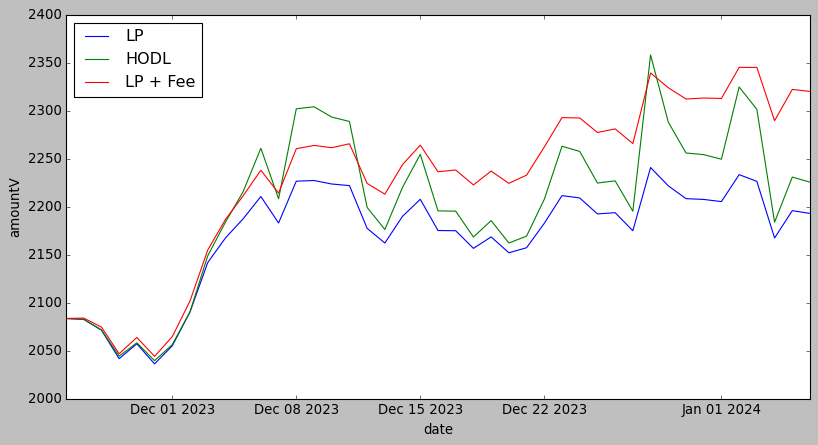

In [42]:
f2 = plt.figure(figsize=(12,6))
sns.lineplot(x=final2.index, y=final2.amountV, label='LP')
sns.lineplot(x=final2.index, y=final2.HODL, label='HODL')
sns.lineplot(x=final2.index, y=final2.amountV + final2.feecumsum, label='LP + Fee')
plt.legend(loc='upper left')

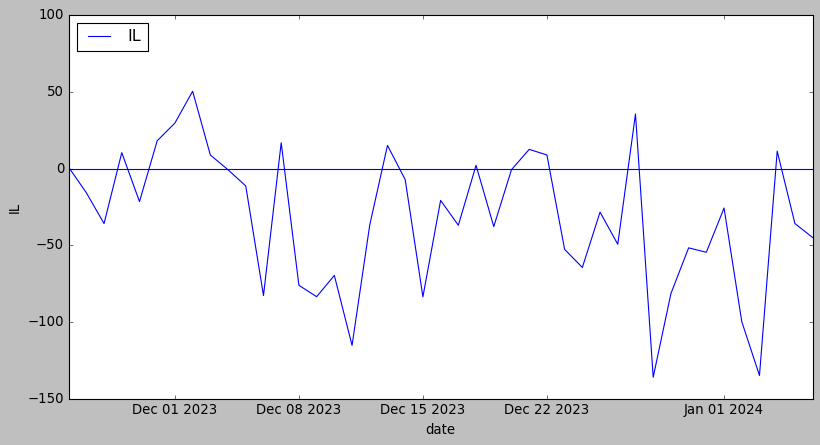

In [36]:
f = plt.figure(figsize=(12,6))
sns.lineplot(data=final2, x='date', y='IL', label='IL')
plt.axhline()
plt.legend(loc='upper left')

In [46]:
final3 = pd.DataFrame()
final3['amountV'] = data['amountV']

final3['amountVlast'] = data['amountV'].shift(-1)
final3['date'] = data['date']
final3['HODL'] = data['amount0'].iloc[-1] + data['amount1'].iloc[-1] * data['close']
# final3['HODL'] = data['amount0'].iloc[0] / data['close'] + data['amount1'].iloc[0]

final3['amountVlast'].iloc[-1] = final3['HODL'].iloc[-1]
final3['IL'] = final3['amountVlast'] - final3['HODL']
final3['feecumsum'] = data['feeV'][::-1].cumsum()
final3['PNL'] = final3['feecumsum'] + final3['IL']
final3['HODLnorm'] = final3['HODL'] / final3['amountV'].iloc[0] * 100
final3['ILnorm'] = final3['IL'] / final3['amountV'].iloc[0] * 100
final3['PNLnorm'] = final3['PNL'] / final3['amountV'].iloc[0] * 100
final3['feecumsumnorm'] = final3['feecumsum'] / final3['amountV'].iloc[0] * 100

# ch2 = final3[['amountV', 'feecumsum']]
# ch3 = final3[['ILnorm', 'PNLnorm', 'feecumsumnorm']]
final3

/var/folders/s0/gcg7k5ws6hxfgnzww6_ryn0c0000gn/T/ipykernel_4009/298644379.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final3['amountVlast'].iloc[-1] = final3['HODL'].iloc[-1]


,amountV,amountVlast,date,HODL,IL,feecumsum,PNL,HODLnorm,ILnorm,PNLnorm,feecumsumnorm
0,2181.021346,2180.995379,2024-01-06 11:00:00,2204.772312,-23.776933,127.042158,103.265225,101.088984,-1.090174,4.734719,5.824893
1,2180.995379,2180.472977,2024-01-06 10:00:00,2204.730028,-24.257051,126.944208,102.687158,101.087045,-1.112188,4.708214,5.820402
2,2180.472977,2181.279938,2024-01-06 09:00:00,2203.881232,-22.601294,126.911544,104.310250,101.048128,-1.036271,4.782633,5.818904
3,2181.279938,2179.182018,2024-01-06 08:00:00,2205.193876,-26.011857,126.882795,100.870938,101.108312,-1.192646,4.624940,5.817586
4,2179.182018,2172.882464,2024-01-06 07:00:00,2201.798712,-28.916247,126.835661,97.919414,100.952644,-1.325812,4.489613,5.815425
...,...,...,...,...,...,...,...,...,...,...,...
995,2082.981716,2084.762123,2023-11-26 00:00:00,2082.982974,1.779148,0.096307,1.875456,95.504933,0.081574,0.085990,0.004416
996,2084.762123,2083.783353,2023-11-25 23:00:00,2084.763535,-0.980182,0.057102,-0.923080,95.586572,-0.044941,-0.042323,0.002618
997,2083.783353,2084.301244,2023-11-25 22:00:00,2083.783360,0.517883,0.041463,0.559346,95.541631,0.023745,0.025646,0.001901
998,2084.301244,2083.847474,2023-11-25 21:00:00,2084.301591,-0.454117,0.027132,-0.426985,95.565392,-0.020821,-0.019577,0.001244


<AxesSubplot:xlabel='date', ylabel='amountV'>

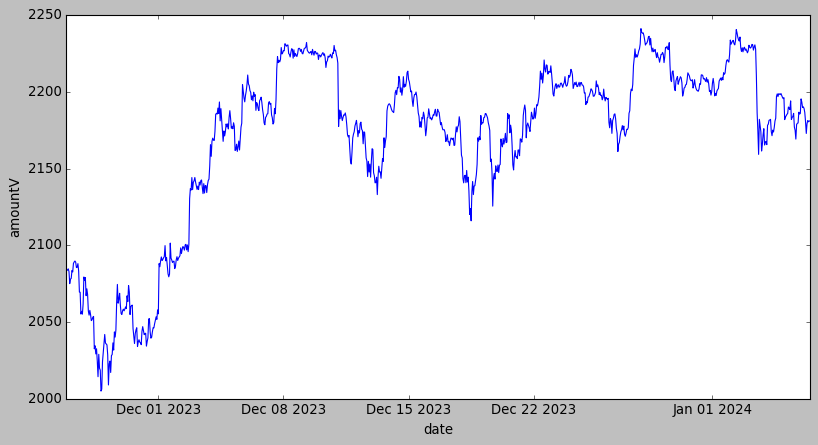

In [47]:
f2 = plt.figure(figsize=(12,6))
sns.lineplot(x=final3.date, y=final3.amountV)
# plt.legend(loc='upper left')

<AxesSubplot:xlabel='date', ylabel='feecumsum'>

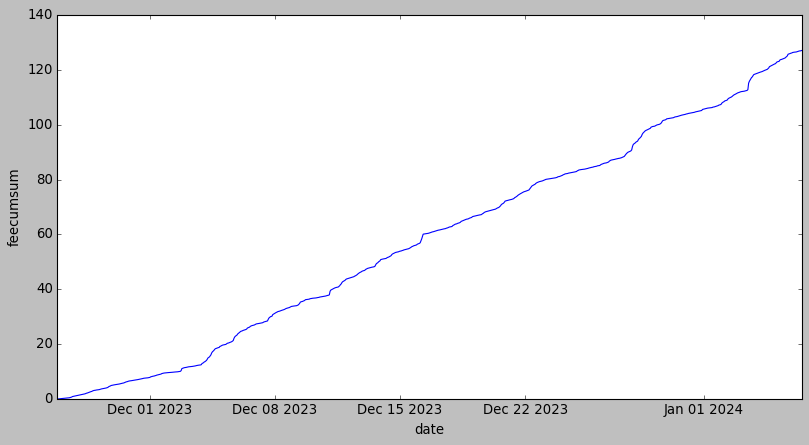

In [48]:
f2 = plt.figure(figsize=(12,6))
sns.lineplot(x=final3.date, y=final3.feecumsum)
# plt.legend(loc='upper left')

<AxesSubplot:xlabel='date', ylabel='ILnorm'>

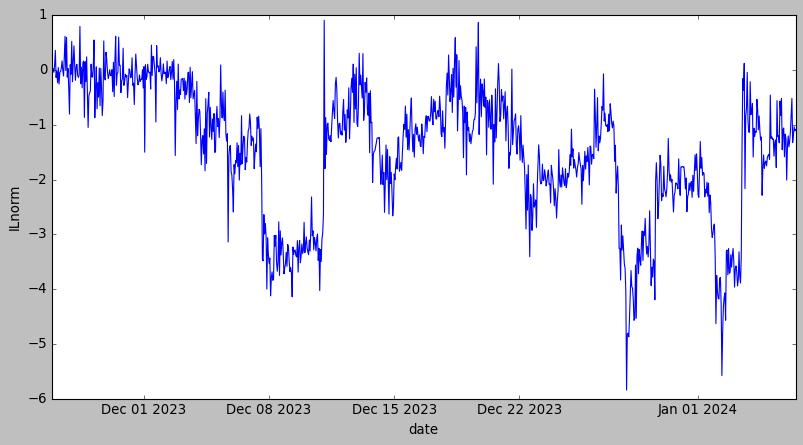

In [49]:
f2 = plt.figure(figsize=(12,6))
sns.lineplot(x=final3.date, y=final3.ILnorm)
# plt.legend(loc='upper left')

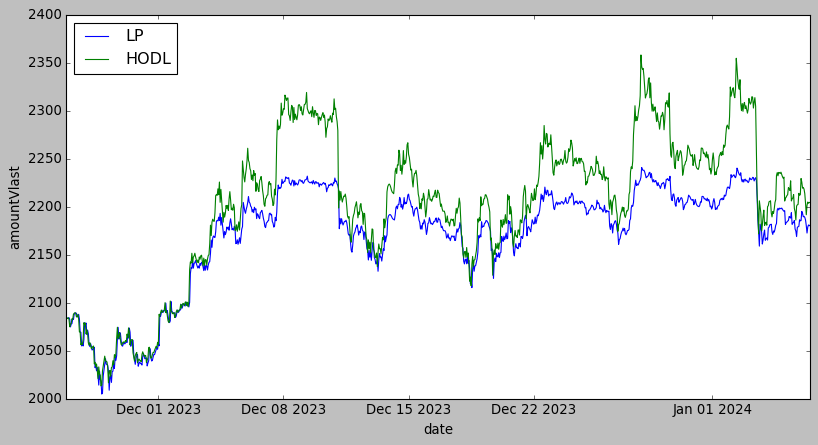

In [50]:
f = plt.figure(figsize=(12,6))
sns.lineplot(data=final3, x='date', y='amountVlast', label='LP')
sns.lineplot(data=final3, x='date', y='HODL', label='HODL')
plt.legend(loc='upper left')

In [84]:
def chart1(dpd, base, myliquidity):
    if base == 0:
        dpd['feeV'] = (dpd['myfee0']) + (dpd['myfee1'] * dpd['close'])
        dpd['amountV'] = (dpd['amount0']) + (dpd['amount1'] * dpd['close'])
        dpd['amountunb'] = (dpd['amount0unb']) + (dpd['amount1unb'] * dpd['close'])
        dpd['fgV'] = (dpd['fee0token']) + (dpd['fee1token'] * dpd['close'])
        dpd['feeusd'] = dpd['feeV'] * (dpd['pool.totalValueLockedUSD'].iloc[0] / (
                    dpd['pool.totalValueLockedToken1'].iloc[0] * dpd['close'].iloc[0] + (
            dpd['pool.totalValueLockedToken0'].iloc[0])))

    else:

        dpd['feeV'] = (dpd['myfee0'] / dpd['close']) + dpd['myfee1']
        dpd['amountV'] = (dpd['amount0'] / dpd['close']) + dpd['amount1']
        dpd['feeVbase0'] = dpd['myfee0'] + (dpd['myfee1'] * dpd['close'])
        dpd['amountunb'] = (dpd['amount0unb'] / dpd['close']) + dpd['amount1unb']
        dpd['fgV'] = (dpd['fee0token'] / dpd['close']) + dpd['fee1token']
        dpd['feeusd'] = dpd['feeV'] * (dpd['pool.totalValueLockedUSD'].iloc[0] / (
                    dpd['pool.totalValueLockedToken1'].iloc[0] + (
                        dpd['pool.totalValueLockedToken0'].iloc[0] / dpd['close'].iloc[0])))

    dpd['date'] = pd.to_datetime(dpd['periodStartUnix'], unit='s')

    # 1 Chart

    # dpd['fgV']= (dpd['fg0'] / dpd['close'].iloc[0] + dpd['fg1'])
    # rint(dpd['fg1']/dpd['amount1unb'])

    data = dpd[
        ['date', 'myfee0', 'myfee1', 'fgV', 'feeV', 'feeusd', 'amountV', 'ActiveLiq', 'amountunb', 'amount0', 'amount1',
         'close']]
    data = data.fillna(0)

    temp = data.resample('D', on='date').sum()
    final1 = temp[['myfee0', 'myfee1', 'feeV', 'fgV', 'feeusd']].copy()

    temp2 = data.resample('D', on='date').mean()
    final1['ActiveLiq'] = temp2['ActiveLiq'].copy()

    temp3 = data.resample('D', on='date').first()
    final1[['amountV', 'amountunb']] = temp3[['amountV', 'amountunb']].copy()
    temp4 = data.resample('D', on='date').last()
    final1[['amountVlast']] = temp4[['amountV']]

    final1['S1%'] = final1['feeV'] / final1['amountV'] * 100  # *365
    final1['unb%'] = final1['fgV'] / final1['amountunb'] * 100  # *365
    final1['multiplier'] = final1['S1%'] / final1['unb%']
    final1['feeunb'] = final1['amountV'] * final1['unb%'] / 100
    final1.to_csv("chart1.csv", sep=";")

    print(final1[['feeunb', 'feeV', 'feeusd', 'amountV', 'ActiveLiq', 'S1%', 'unb%', 'ActiveLiq']])

    print('------------------------------------------------------------------')
    print("this position returned", final1['feeV'].sum() / final1['amountV'].iloc[0] * 100, "in ", len(final1.index),
          " days, for an apr of ", final1['feeV'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100)
    print("a base  position returned", final1['feeunb'].sum() / final1['amountV'].iloc[0] * 100, "in ",
          len(final1.index), " days, for an apr of ",
          final1['feeunb'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100)

    print("fee in token 1 and token 2", dpd['myfee0'].sum(), dpd['myfee1'].sum())
    print("totalFee in USD", final1['feeusd'].sum())
    print('Your liquidity was active for:', final1['ActiveLiq'].mean())
    forecast = (dpd['feeVbase0'].sum() * myliquidity * final1['ActiveLiq'].mean())
    print(dpd['feeVbase0'])
    print('forecast: ', forecast)
    print('------------------------------------------------------------------')
    # 1 chart e' completo

    # 2 chart

    final2 = temp3[['amountV', 'amount0', 'amount1', 'close']].copy()
    final2['feeV'] = temp['feeV'].copy()
    final2[['amountVlast']] = temp4[['amountV']]

    final2['HODL'] = final2['amount0'].iloc[0] / final2['close'] + final2['amount1'].iloc[0]

    final2['IL'] = final2['amountVlast'] - final2['HODL']
    final2['ActiveLiq'] = temp2['ActiveLiq'].copy()
    final2['feecumsum'] = final2['feeV'].cumsum()
    final2['PNL'] = final2['feecumsum'] + final2['IL']  # -Bfinal['gas']

    final2['HODLnorm'] = final2['HODL'] / final2['amountV'].iloc[0] * 100
    final2['ILnorm'] = final2['IL'] / final2['amountV'].iloc[0] * 100
    final2['PNLnorm'] = final2['PNL'] / final2['amountV'].iloc[0] * 100
    final2['feecumsumnorm'] = final2['feecumsum'] / final2['amountV'].iloc[0] * 100
    ch2 = final2[['amountV', 'feecumsum']]
    ch3 = final2[['ILnorm', 'PNLnorm', 'feecumsumnorm']]

    final2.to_csv("chart2.csv", sep=";")
    print(ch2)
    print(ch3)

    # final3=data
    final3 = pd.DataFrame()
    final3['amountV'] = data['amountV']

    final3['amountVlast'] = data['amountV'].shift(-1)
    final3['date'] = data['date']
    final3['HODL'] = data['amount0'].iloc[0] / data['close'] + data['amount1'].iloc[0]

    final3['amountVlast'].iloc[-1] = final3['HODL'].iloc[-1]
    final3['IL'] = final3['amountVlast'] - final3['HODL']
    final3['feecumsum'] = data['feeV'][::-1].cumsum()
    final3['PNL'] = final3['feecumsum'] + final3['IL']
    final3['HODLnorm'] = final3['HODL'] / final3['amountV'].iloc[0] * 100
    final3['ILnorm'] = final3['IL'] / final3['amountV'].iloc[0] * 100
    final3['PNLnorm'] = final3['PNL'] / final3['amountV'].iloc[0] * 100
    final3['feecumsumnorm'] = final3['feecumsum'] / final3['amountV'].iloc[0] * 100

    ch2 = final3[['amountV', 'feecumsum']]
    ch3 = final3[['ILnorm', 'PNLnorm', 'feecumsumnorm']]

    print(ch2)
    print(ch3)


In [83]:
a = chart1(dpd, base, myliquidity)

NameError: name 'chart1' is not defined

In [ ]:
# '''
# query ($fromdate: Int!){
#   poolHourDatas(
#     where: {pool: "''' + str(Adress) + '''",, periodStartUnix_gt: $fromdate},
#     orderBy: periodStartUnix,
#     orderDirection: desc,
#     first: 1000
#   ) {
#     periodStartUnix
#     liquidity
#     low
#     pool {
#       totalValueLockedUSD
#       totalValueLockedToken1
#       totalValueLockedToken0
#       token0 {
#         decimals
#       }
#       token1 {
#         decimals
#       }
#     }
#     close
#     feeGrowthGlobal0X128
#     feeGrowthGlobal1X128
#   }
# }
# '''